readdone
readdone
readdone
readdone
readdone
readdone
419


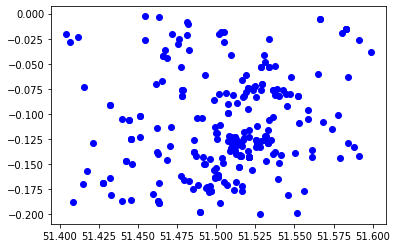

In [5]:
import process_json as pj

#must use relative path
#ipython's default path is different from python's
filename_night1 = "../201206_tweets/activities_201206100000_201206100010.json"
filename_night2 = "../201206_tweets/activities_201206100400_201206100410.json"
filename_night3 = "../201206_tweets/activities_201206102100_201206102110.json"
filename_day1 = "../201206_tweets/activities_201206101200_201206101210.json"
filename_day2 = "../201206_tweets/activities_201206101600_201206101610.json"
filename_day3 = "../201206_tweets/activities_201206100900_201206100910.json"
json_processor = pj.process_json()
papers_night = []
papers_night = json_processor.read_single_file(filename_night1,papers_night)
papers_night = json_processor.read_single_file(filename_night2,papers_night)
papers_night = json_processor.read_single_file(filename_night3,papers_night)
# json_processor.draw_geo(papers_night)
papers_day = []
papers_day = json_processor.read_single_file(filename_day1,papers_day)
papers_day = json_processor.read_single_file(filename_day2,papers_day)
papers_day = json_processor.read_single_file(filename_day3,papers_day)
json_processor.draw_geo(papers_day)

papers = papers_day+papers_night
print(len(papers))

In [ ]:
#用 全连接神经网络 进行分辨
#目标：输出三色，白天和黑夜重合的部分输出绿色
import torch